In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the necessary functions and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Importing the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



In [40]:
# Load dataset and create a DataFrame
# Specify the file path of the CSV file
file_path = "C:/Users/pingk/OneDrive - Chulalongkorn University/Documents/mekargit/zaytalnakhil-1/20240430_databasah_csv.csv"

# Load the dataset into a DataFrame
df1 = pd.read_csv(file_path)

C:\Users\pingk\AppData\Local\Temp\ipykernel_54000\2028145381.py:6: DtypeWarning: Columns (3367,3369) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path)


In [41]:
# Display the missing values in the DataFrame
df1.isnull().sum()

Datapoints      0
3225.795591     0
3226.297348     0
3226.799261     0
3227.30133      0
               ..
mm              0
ftirrun_yyyy    0
ftirrun_mmm     0
ftirrun_m       0
ftirrun_yymm    0
Length: 3374, dtype: int64

In [42]:
# Find duplicate rows
duplicate_rows = df1.duplicated()

# Print the duplicate rows
print(duplicate_rows.sum())

0


In [43]:
# Assuming df is your DataFrame
df1_1 = df1.drop_duplicates()

print(df1.shape[0] - df1_1.shape[0])

0


In [44]:
# Drop columns that are not needed
df1_2 = df1_1.drop(['Datapoints',
                    'samplecode', 
                    'countrycode',
                    'provincecode', 
                    'yymm', 
                    'yy',
                    'mm',
                    'ftirrun_yyyy',
                    'ftirrun_mmm',
                    'ftirrun_m',
                    'ftirrun_yymm'],
                    axis=1)
df1_2

,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,3230.31703,...,15296.35997,15307.6488,15318.9543,15330.27651,15341.61547,15352.97122,15364.34379,15375.73322,15387.13955,countrytarget
0,0.004393,0.004496,0.004647,0.004797,0.004890,0.004878,0.004733,0.004461,0.004096,0.003698,...,0.017438,0.019063,0.020884,0.022496,0.023560,0.023910,0.023575,0.022735,0.021611,0
1,0.004996,0.005020,0.005068,0.005098,0.005065,0.004930,0.004673,0.004306,0.003863,0.003403,...,0.016140,0.017375,0.018717,0.020097,0.021393,0.022464,0.023180,0.023461,0.023297,0
2,0.003594,0.003403,0.003151,0.002869,0.002573,0.002268,0.001962,0.001675,0.001440,0.001306,...,0.022086,0.022069,0.022105,0.021981,0.021515,0.020615,0.019312,0.017765,0.016203,0
3,0.004154,0.004115,0.003974,0.003771,0.003545,0.003316,0.003093,0.002885,0.002702,0.002565,...,0.021070,0.019918,0.019159,0.018762,0.018584,0.018422,0.018057,0.017335,0.016211,0
4,0.004019,0.003930,0.003819,0.003692,0.003547,0.003379,0.003192,0.002997,0.002818,0.002683,...,0.015772,0.015563,0.016039,0.016881,0.017657,0.017966,0.017539,0.016355,0.014635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,0.003384,0.003551,0.003662,0.003714,0.003716,0.003689,0.003658,0.003645,0.003662,0.003706,...,0.016078,0.015783,0.014816,0.013412,0.011928,0.010690,0.009904,0.009578,0.009564,0
1865,0.004059,0.003997,0.003848,0.003643,0.003430,0.003259,0.003167,0.003170,0.003260,0.003407,...,0.023679,0.023296,0.022183,0.020519,0.018626,0.016843,0.015449,0.014542,0.014042,0
1866,0.002439,0.002526,0.002592,0.002653,0.002721,0.002801,0.002886,0.002961,0.003013,0.003033,...,0.021880,0.021557,0.020385,0.018496,0.016248,0.014117,0.012594,0.011999,0.012405,0
1867,0.003070,0.003137,0.003172,0.003163,0.003114,0.003040,0.002963,0.002906,0.002883,0.002896,...,0.020242,0.019905,0.019131,0.017997,0.016741,0.015654,0.014982,0.014790,0.014949,0


In [45]:
# Dimensions of the data
df1_2.shape

(1869, 3363)

In [46]:
X = df1_2.drop('countrytarget', axis=1)
y = df1_2['countrytarget']

In [47]:
#from sklearn.model_selection import train_test_split

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model
scaler = StandardScaler()

In [55]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Data splitting
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train_pipe_a, X_test_pipe_a, y_train_pipe_a, y_test_pipe_a = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the training set into training and validation sets
X_train_pipe_a, X_val_pipe_a, y_train_pipe_a, y_val_pipe_a = train_test_split(X_train_pipe_a, y_train_pipe_a, test_size=0.2, random_state=42)

# Define the pipeline
pca = PCA(n_components=2)  # 2 components
pipe_a = make_pipeline(pca)

# Fit the pipeline to the training data
pipe_a.fit(X_train_pipe_a, y_train_pipe_a)

# Transform the test data
transformed_test_data = pipe_a.transform(X_test_pipe_a)

# Store the transformed data in a DataFrame
df_transformed_test_data = pd.DataFrame(transformed_test_data, columns=['PC1', 'PC2'])

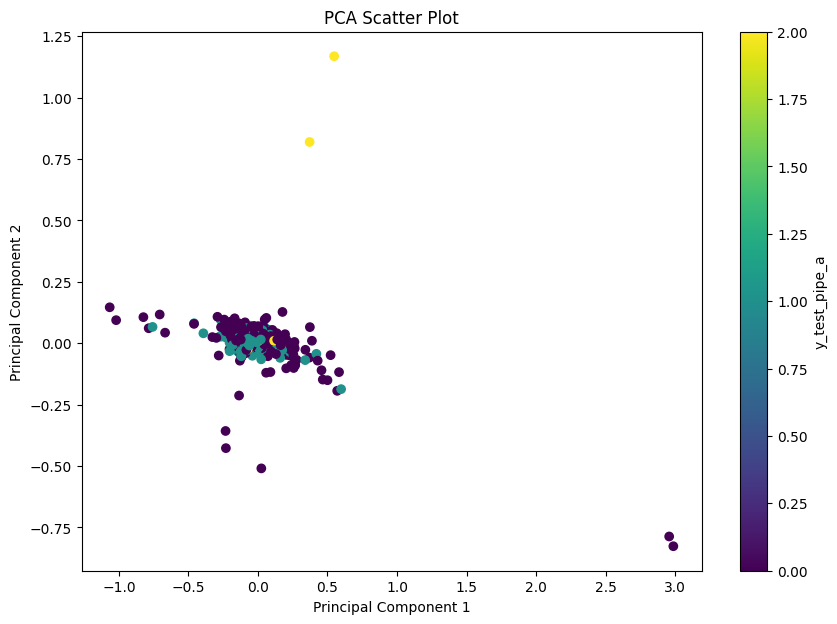

In [57]:
import matplotlib.pyplot as plt

# Create a scatter plot of the scores from the PCA
plt.figure(figsize=(10, 7))
plt.scatter(df_transformed_test_data['PC1'], df_transformed_test_data['PC2'], c=y_test_pipe_a)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='y_test_pipe_a')
plt.show()

With Standard Scaler

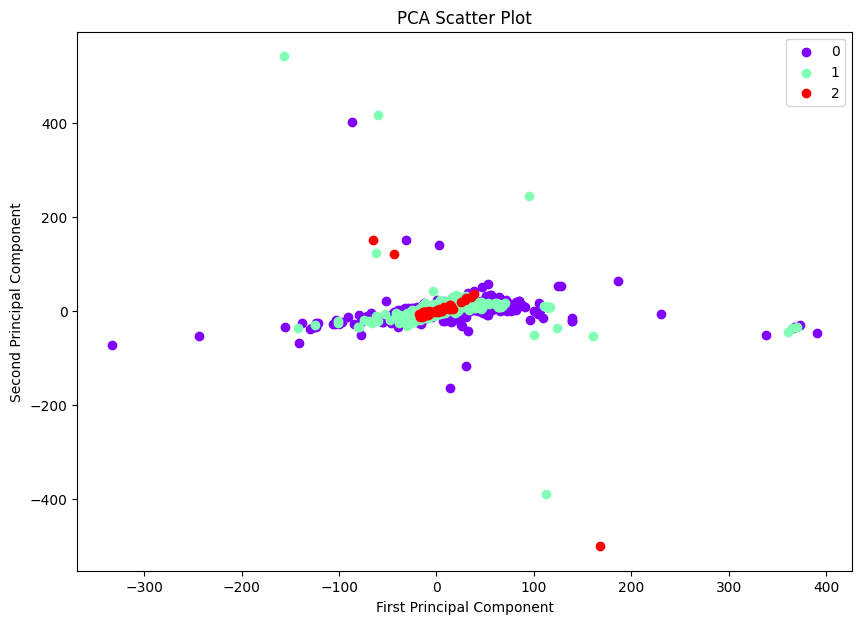

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Define the pipeline b
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X)
pca1 = PCA(n_components=2)  # 2 components
pipe_b = make_pipeline(scaler1, pca1)

# Fit the pipeline to the data
pipe_b.fit(X)

# Transform the data
transformed_data_b = pipe_b.transform(X)

import matplotlib.pyplot as plt
import numpy as np

# Get unique classes and their corresponding colors
classes = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(10, 7))

# Create a scatter plot for each class
for i, class_ in enumerate(classes):
    plt.scatter(transformed_data_b[y == class_, 0], transformed_data_b[y == class_, 1], color=colors[i], label=class_)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.legend()  # Show legend
plt.show()

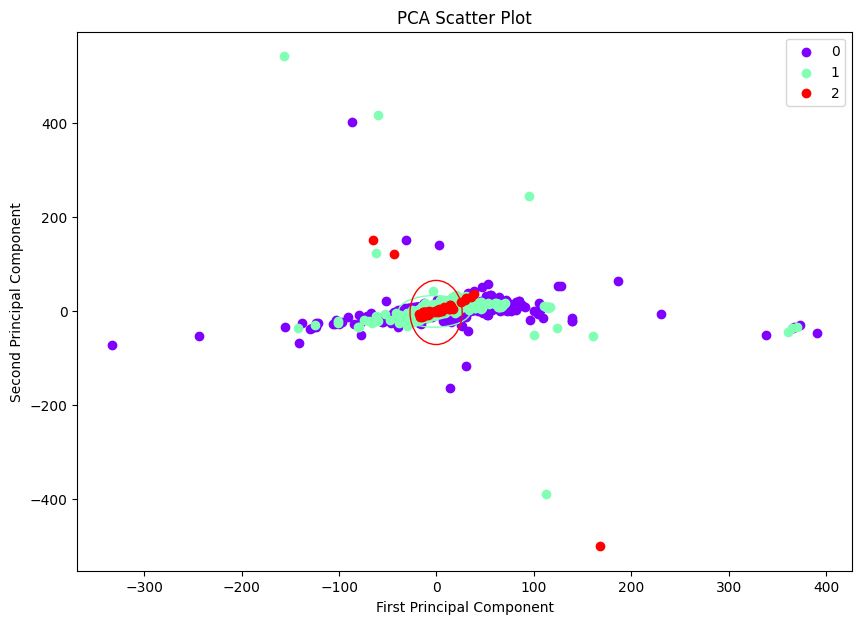

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Define the pipeline b
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X)
pca1 = PCA(n_components=2)  # 2 components
pipe_b = make_pipeline(scaler1, pca1)

# Fit the pipeline to the data
pipe_b.fit(X)

# Transform the data
transformed_data_b = pipe_b.transform(X)

# Get unique classes and their corresponding colors
classes = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(10, 7))

# Create a scatter plot for each class
for i, class_ in enumerate(classes):
    class_data = transformed_data_b[y == class_, :]
    plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[i], label=class_)
    
    # Calculate the mean and standard deviation of the class data
    mean = np.mean(class_data, axis=0)
    std_dev = np.std(class_data, axis=0)
    
    # Create an ellipse centered at the mean with width and height 2 standard deviations
    ellipse = patches.Ellipse(mean, std_dev[0]*2, std_dev[1]*2, edgecolor=colors[i], facecolor='none')
    
    # Add the ellipse to the plot
    plt.gca().add_artist(ellipse)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.legend()  # Show legend
plt.show()

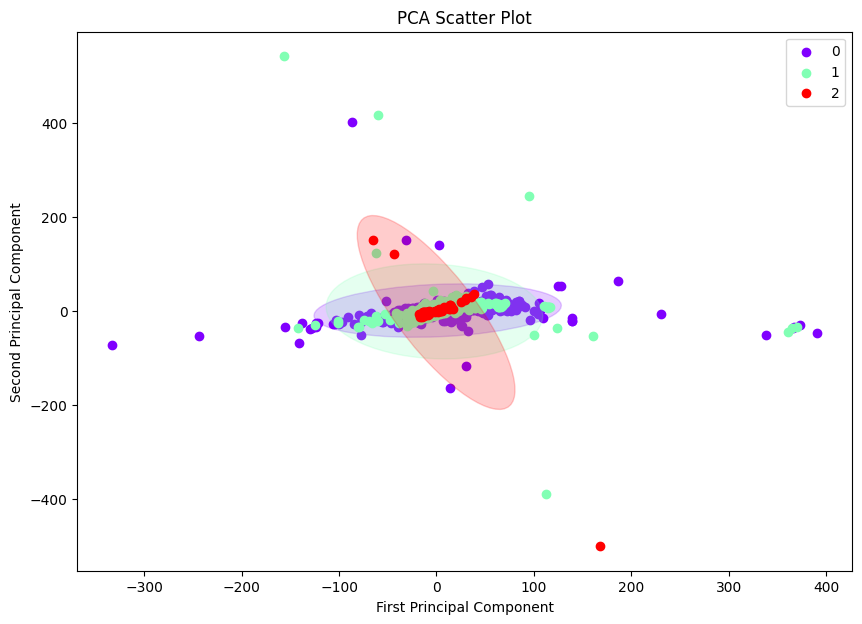

In [70]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Define the pipeline b
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X)
pca1 = PCA(n_components=2)  # 2 components
pipe_b = make_pipeline(scaler1, pca1)

# Fit the pipeline to the data
pipe_b.fit(X)

# Transform the data
transformed_data_b = pipe_b.transform(X)

# Function to get the ellipse
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height, angle=np.degrees(theta), **kwargs)

# Get unique classes and their corresponding colors
classes = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(10, 7))

# Create a scatter plot for each class
for i, class_ in enumerate(classes):
    class_data = transformed_data_b[y == class_, :]
    plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[i], label=class_)
    
    # Calculate the mean and covariance of the class data
    mean = np.mean(class_data, axis=0)
    cov = np.cov(class_data.T)
    
    # Create an ellipse centered at the mean with width and height 2 standard deviations
    ellipse = get_cov_ellipse(cov, mean, 3, edgecolor=colors[i], facecolor=colors[i], alpha=0.2)
    
    # Add the ellipse to the plot
    plt.gca().add_artist(ellipse)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.legend()  # Show legend
plt.show()

PCA components 0.99

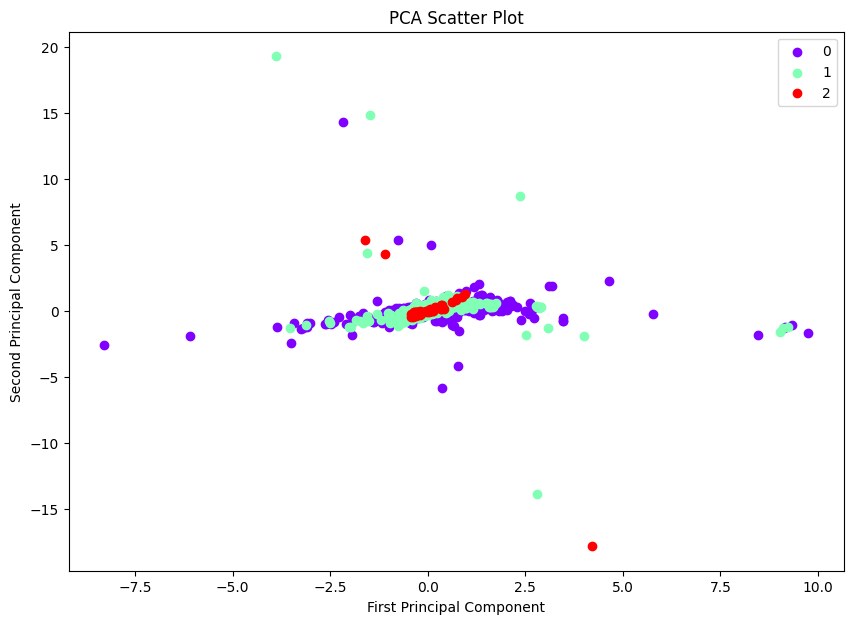

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Define the pipeline b
scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(X)
pca1 = PCA(n_components=0.99, whiten=True)  # 2 components
pipe_b = make_pipeline(scaler1, pca1)

# Fit the pipeline to the data
pipe_b.fit(X)

# Transform the data
transformed_data_b = pipe_b.transform(X)

import matplotlib.pyplot as plt
import numpy as np

# Get unique classes and their corresponding colors
classes = np.unique(y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))

plt.figure(figsize=(10, 7))

# Create a scatter plot for each class
for i, class_ in enumerate(classes):
    plt.scatter(transformed_data_b[y == class_, 0], transformed_data_b[y == class_, 1], color=colors[i], label=class_)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.legend()  # Show legend
plt.show()

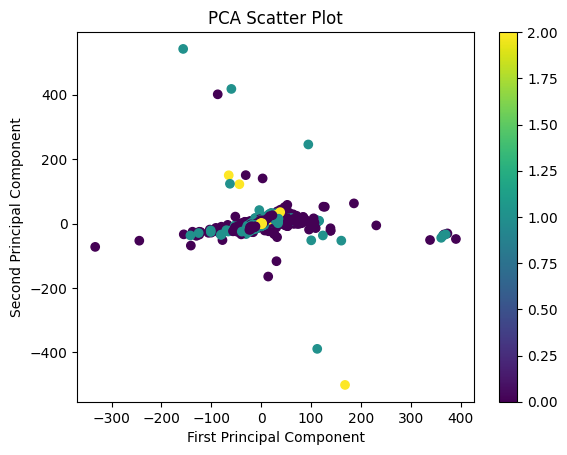

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

class SNV(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply Standard Normal Variate (SNV)
        X_snv = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        return X_snv

# Create the pipeline
snv = SNV()
pca = PCA(n_components=2)  # 2 components
pipe_SNV_coup = make_pipeline(snv, pca)

# Fit the pipeline to the data
pipe_SNV_coup.fit(X)

# Transform the data
transformed_data_SNV = pipe_SNV_coup.transform(X)

# Calculate performance metrics
# Assuming y_true is the true labels and y_pred is the predicted labels
# accuracy = accuracy_score(y_true, y_pred)
# print(f'Accuracy: {accuracy}')

# Create a scatter plot of the transformed data
# Assuming y is a 1D array containing the class labels for the data points in X
plt.scatter(transformed_data_SNV[:, 0], transformed_data_SNV[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()  # To show the color scale
plt.show()

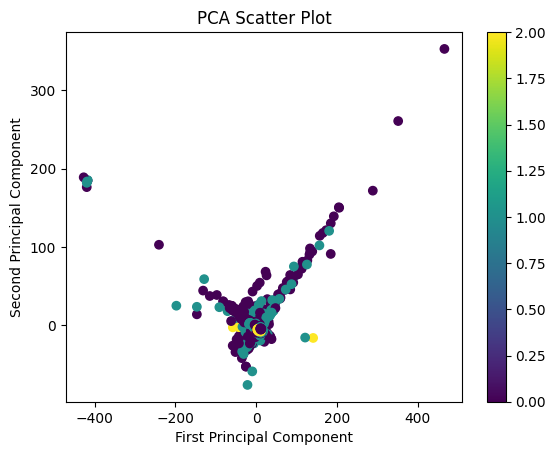

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

class RNV(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply Residual Normal Variate (RNV)
        model = LinearRegression()
        model.fit(np.arange(X.shape[1]).reshape(-1, 1), X.T)
        X_hat = model.predict(np.arange(X.shape[1]).reshape(-1, 1)).T
        residuals = X - X_hat
        X_rnv = (residuals - np.mean(residuals, axis=0)) / np.std(residuals, axis=0)
        return X_rnv

# Create the pipeline
rnv = RNV()
pca = PCA(n_components=2)  # 2 components
pipe_RNV_coup = make_pipeline(rnv, pca)

# Fit the pipeline to the data
pipe_RNV_coup.fit(X)

# Transform the data
transformed_data_RNV = pipe_RNV_coup.transform(X)

# Calculate performance metrics
# Assuming y_true is the true labels and y_pred is the predicted labels
# accuracy = accuracy_score(y_true, y_pred)
# print(f'Accuracy: {accuracy}')

# Create a scatter plot of the transformed data
# Assuming y is a 1D array containing the class labels for the data points in X
plt.scatter(transformed_data_RNV[:, 0], transformed_data_RNV[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()  # To show the color scale
plt.show()

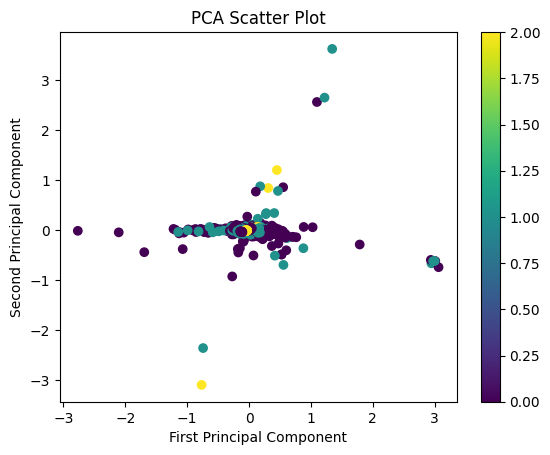

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

class SavGol(BaseEstimator, TransformerMixin):
    def __init__(self, window_length=5, polyorder=2):
        self.window_length = window_length
        self.polyorder = polyorder

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply Savitzky-Golay filter
        X_savgol = savgol_filter(X, self.window_length, self.polyorder, axis=1)
        return X_savgol

# Create the pipeline
savgol = SavGol(window_length=5, polyorder=2)
pca = PCA(n_components=2)  # 2 components
pipe_SavGol_coup = make_pipeline(savgol, pca)

# Fit the pipeline to the data
pipe_SavGol_coup.fit(X)

# Transform the data
transformed_data_SavGol = pipe_SavGol_coup.transform(X)

# Calculate performance metrics
# Assuming y_true is the true labels and y_pred is the predicted labels
# accuracy = accuracy_score(y_true, y_pred)
# print(f'Accuracy: {accuracy}')

# Create a scatter plot of the transformed data
# Assuming y is a 1D array containing the class labels for the data points in X
plt.scatter(transformed_data_SavGol[:, 0], transformed_data_SavGol[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()  # To show the color scale
plt.show()

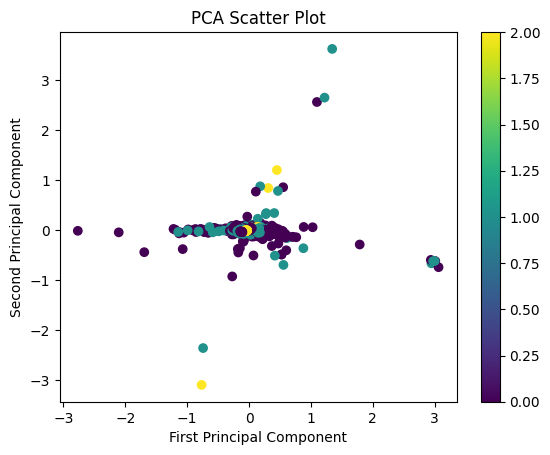

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

class SavGol(BaseEstimator, TransformerMixin):
    def __init__(self, window_length=5, polyorder=2):
        self.window_length = window_length
        self.polyorder = polyorder

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply Savitzky-Golay filter
        X_savgol = savgol_filter(X, self.window_length, self.polyorder, axis=1)
        return X_savgol

# Create the pipeline
savgol = SavGol(window_length=5, polyorder=2)
pca = PCA(n_components=2)  # 2 components
pipe_SavGol_coup = make_pipeline(savgol, pca)

# Fit the pipeline to the data
pipe_SavGol_coup.fit(X)

# Transform the data
transformed_data_SavGol = pipe_SavGol_coup.transform(X)

# Calculate performance metrics
# Assuming y_true is the true labels and y_pred is the predicted labels
# accuracy = accuracy_score(y_true, y_pred)
# print(f'Accuracy: {accuracy}')

# Create a scatter plot of the transformed data
# Assuming y is a 1D array containing the class labels for the data points in X
plt.scatter(transformed_data_SavGol[:, 0], transformed_data_SavGol[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()  # To show the color scale
plt.show()

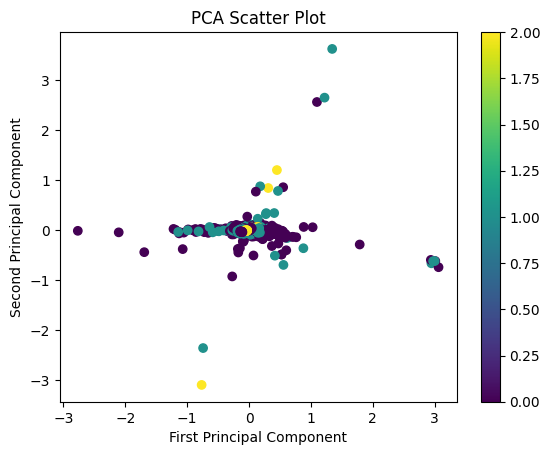

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

class MeanCent(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply Mean Centering
        X_cent = X - np.mean(X, axis=0)
        return X_cent

# Create the pipeline
meancent = MeanCent()
pca = PCA(n_components=2)  # 2 components
pipe_MeanCent_coup = make_pipeline(meancent, pca)

# Fit the pipeline to the data
pipe_MeanCent_coup.fit(X)

# Transform the data
transformed_data_MeanCent = pipe_MeanCent_coup.transform(X)

# Calculate performance metrics
# Assuming y_true is the true labels and y_pred is the predicted labels
# accuracy = accuracy_score(y_true, y_pred)
# print(f'Accuracy: {accuracy}')

# Create a scatter plot of the transformed data
# Assuming y is a 1D array containing the class labels for the data points in X
plt.scatter(transformed_data_MeanCent[:, 0], transformed_data_MeanCent[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()  # To show the color scale
plt.show()

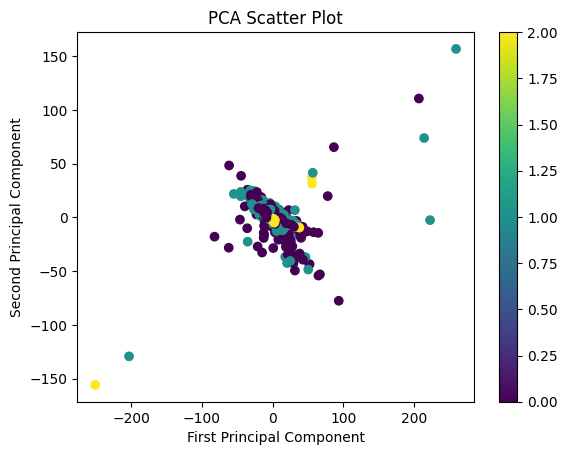

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

class MedianScaling(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply Median Scaling
        X_scaled_ms = X / np.median(X, axis=0)
        return X_scaled_ms

# Create the pipeline
medianscaling = MedianScaling()
pca = PCA(n_components=2)  # 2 components
pipe_MedianScaling_coup = make_pipeline(medianscaling, pca)

# Fit the pipeline to the data
pipe_MedianScaling_coup.fit(X)

# Transform the data
transformed_data_MedianScaling = pipe_MedianScaling_coup.transform(X)

# Calculate performance metrics
# Assuming y_true is the true labels and y_pred is the predicted labels
# accuracy = accuracy_score(y_true, y_pred)
# print(f'Accuracy: {accuracy}')

# Create a scatter plot of the transformed data
# Assuming y is a 1D array containing the class labels for the data points in X
plt.scatter(transformed_data_MedianScaling[:, 0], transformed_data_MedianScaling[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()  # To show the color scale
plt.show()

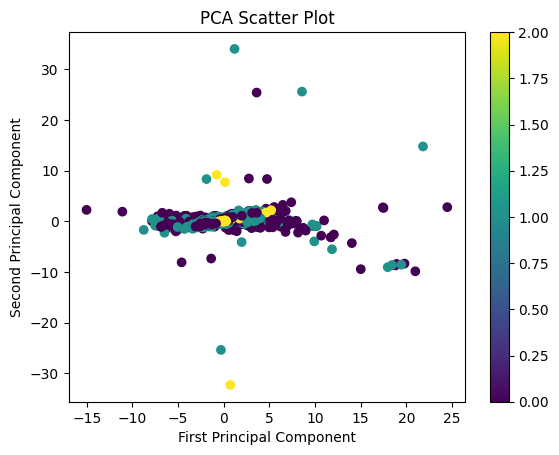

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

class LevScaling(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Apply Level Scaling
        X_scaled = X / np.max(X, axis=0)
        return X_scaled

# Create the pipeline
levscaling = LevScaling()
pca = PCA(n_components=2)  # 2 components
pipe_LevScaling_coup = make_pipeline(levscaling, pca)

# Fit the pipeline to the data
pipe_LevScaling_coup.fit(X)

# Transform the data
transformed_data_LevScaling = pipe_LevScaling_coup.transform(X)

# Calculate performance metrics
# Assuming y_true is the true labels and y_pred is the predicted labels
#accuracy = accuracy_score(y, y_pred)
#print(f'Accuracy: {accuracy}')

# Create a scatter plot of the transformed data
# Assuming y is a 1D array containing the class labels for the data points in X
plt.scatter(transformed_data_LevScaling[:, 0], transformed_data_LevScaling[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.colorbar()  # To show the color scale
plt.show()